# Reading Aid Project by Batch 2

## Module 1: Fetching and Conversion of Image File 

### ~Opening Image via inbuilt tkinter file dialog library

In [5]:
from tkinter import *
from tkinter.filedialog import askopenfilename
root = Tk()
root.withdraw()
file_path = askopenfilename()
print(file_path)
root.destroy()

C:/Users/Rahul/Desktop/OCR/data/test.jpeg


### ~Converion of Image using Pillow library

In [6]:
import cv2
import pyttsx3
import pytesseract
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
image_file=file_path
if(file_path[-4:]=='.png'):
    im=Image.open(file_path)
    im=im.convert('RGB')
    im.save("jpg_image.jpg")
    img=cv2.imread("C:/Users/Rahul/Desktop/OCR/jpg_image.jpg")
else:
    img=cv2.imread(image_file)

### ~display function 

In [7]:
def display(im_path):
    dpi=80
    im_data=plt.imread(im_path)
    if(len(im_data.shape)<3):
        height, width = im_data.shape
    else:
        height, width, depth = im_data.shape
    
    figsize= width/float(dpi), height/float(dpi)
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    ax.axis('off')
    
    ax.imshow(im_data, cmap='gray')
    
    plt.show()

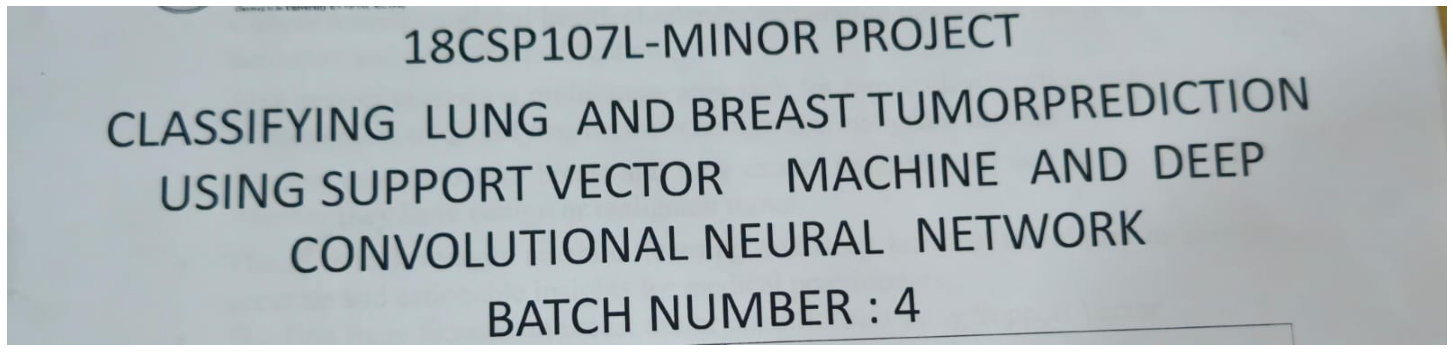

In [8]:
display(image_file)

## Module 2: Image Preprocessing

### ~Image Inversion using bitwise_not operation

In [9]:
inverted_image=cv2.bitwise_not(img)
cv2.imwrite("temp/inverted.jpg", inverted_image)

True

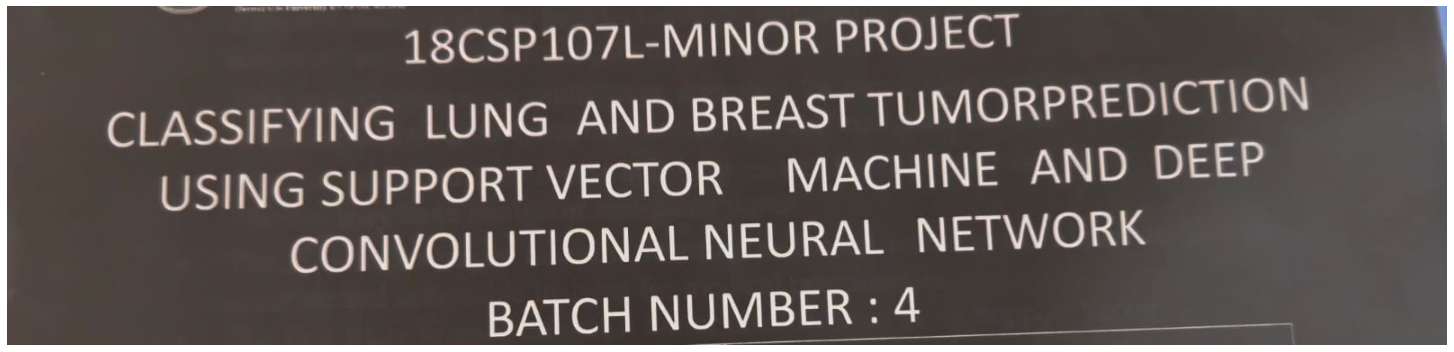

In [10]:
display("temp/inverted.jpg")

### ~grayscale function 

In [11]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [12]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg",gray_image)

True

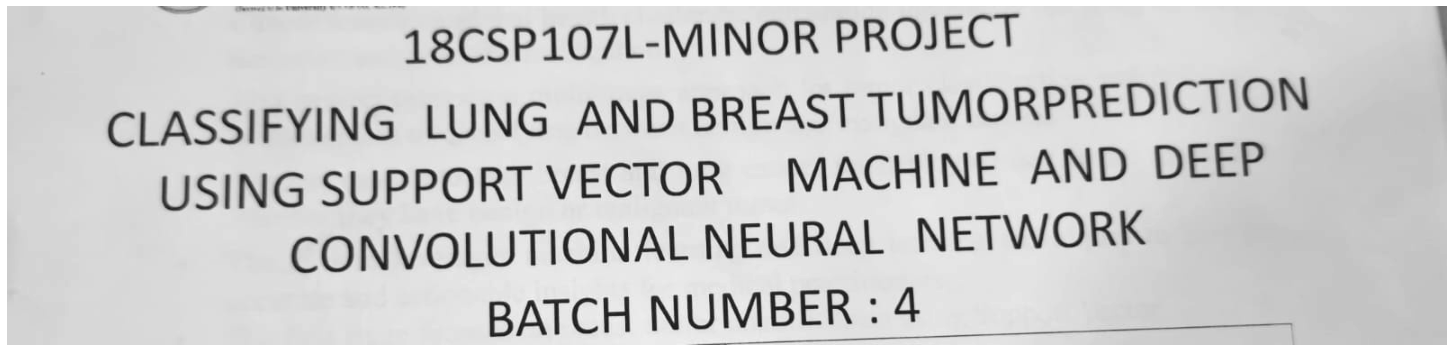

In [13]:
display("temp/gray.jpg")

### ~B/W Conversion

In [14]:
thresh, im_bw=cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image.jpg", im_bw)

True

In [15]:
#display("temp/bw_image.jpg")

### ~Removing noise from Image

In [16]:
def noise_removal(image):
    kernel=np.ones((1,1), np.uint8)
    image=cv2.dilate(image, kernel, iterations=1)
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image=cv2.medianBlur(image, 3)
    return(image)
    

In [17]:
no_noise=noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

In [18]:
#display("temp/no_noise.jpg")

### ~Image Erosion 

In [19]:
def thinning(image):
    image=cv2.bitwise_not(image)
    kernel=np.ones((2,2) ,np.uint8)
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return (image)
    

In [20]:
eroded_image=thinning(no_noise)
cv2.imwrite("temp/eroded_image.jpg",eroded_image)

True

In [21]:
#display("temp/eroded_image.jpg")

### ~Image Dilation 

In [22]:
def thickening(image):
    image=cv2.bitwise_not(image)
    kernel=np.ones((2,2) ,np.uint8)
    image=cv2.dilate(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return (image)

In [23]:
dilated_image=thickening(no_noise)
cv2.imwrite("temp/dilated_image.jpg",dilated_image)

True

In [24]:
#display("temp/dilated_image.jpg")

### ~Removal of Unwanted Borders

In [25]:
color=[255, 255, 255]
top, bottom, left, right=[150]*4
image_with_border=cv2.copyMakeBorder(no_noise, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg",image_with_border)

True

In [26]:
#display("temp/image_with_border.jpg")

## Module 3: Optical Character Recognition using Tesseract Library 

### ~Converting Image to String 

In [27]:
processed_image="temp/image_with_border.jpg"

img=Image.open("temp/gray.jpg")
ocr_result=pytesseract.image_to_string(img,lang="eng")
print(ocr_result)

18CSP107L-MINOR PROJECT
CLASSIFYING LUNG AND BREAST TUMORPREDICTION
USING SUPPORT VECTOR MACHINE AND DEEP
CONVOLUTIONAL NEURAL NETWORK
BATCH NUMBER: 4



### ~Printing the Results

In [28]:
ocr_result.strip()
print(ocr_result)

18CSP107L-MINOR PROJECT
CLASSIFYING LUNG AND BREAST TUMORPREDICTION
USING SUPPORT VECTOR MACHINE AND DEEP
CONVOLUTIONAL NEURAL NETWORK
BATCH NUMBER: 4



## Module 4: Conversion Text to Speech of OCR Results  

### ~ Saving the Text in a Document

In [29]:
file=open("Document.txt","w")
file.write(ocr_result)
file.close()

### ~Text to Speech using tts library of python

In [30]:
text_speech=pyttsx3.init()
text_speech.say(ocr_result)
text_speech.runAndWait()
text_speech.stop()

# © Reading Aid